# Phase 0 – Environment & Setup Sanity Check
# Notebook: notebooks/phase0_setup.ipynb

In [1]:
# 1️⃣ System Info
import sys
import platform
import torch
import torch_geometric
import numpy as np
import pandas as pd
import matplotlib
import nibabel
import nilearn
import 
print("Python Version:", sys.version)
print("Platform:", platform.platform())
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("PyTorch Geometric Version:", torch_geometric.__version__)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Nibabel Version:", nibabel.__version__)
print("Nilearn Version:", nilearn.__version__)

Python Version: 3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 12:58:53) [MSC v.1929 64 bit (AMD64)]
Platform: Windows-11-10.0.26100-SP0
PyTorch Version: 2.5.1
CUDA Available: True
PyTorch Geometric Version: 2.6.1
NumPy Version: 2.3.1
Pandas Version: 2.3.2
Matplotlib Version: 3.10.6
Nibabel Version: 5.3.2
Nilearn Version: 0.12.1


# 2️⃣ Reproducibility – set seeds

In [2]:
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

print(f"Random seeds set to {SEED} for reproducibility ✅")


Random seeds set to 42 for reproducibility ✅


# 3️⃣ GPU Check – small tensor test

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.randn(3, 3, device=device)
    print("GPU Tensor Test:\n", x)
else:
    print("GPU not available, running on CPU ⚠️")


GPU Tensor Test:
 tensor([[ 0.1940,  2.1614, -0.1721],
        [ 0.8491, -1.9244,  0.6530],
        [-0.6494, -0.8175,  0.5280]], device='cuda:0')


# 4️⃣ Simple PyG Graph Test

In [4]:
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)  # edge connections
x = torch.tensor([[1], [2], [3]], dtype=torch.float)       # node features

data = Data(x=x, edge_index=edge_index)
print("Sample PyG Graph:")
print(data)

Sample PyG Graph:
Data(x=[3, 1], edge_index=[2, 4])


## NEW START

In [6]:
##3. Data Confirmation
# Add this to your 00_Environment_Check.ipynb
import os

# Check OASIS data location imagesoasis
oasis_path = "../data/oasis1"
if os.path.exists(oasis_path):
    print("✅ OASIS data found")
    # Count subjects
    subject_dirs = [d for d in os.listdir(oasis_path) if d.startswith('OAS1')]
    print(f"Found {len(subject_dirs)} subject directories")
    
    # Check a sample file
    sample_subject = subject_dirs[0]
    sample_path = os.path.join(oasis_path, sample_subject)
    nii_files = [f for f in os.listdir(sample_path) if f.endswith('.nii.gz')]
    print(f"Sample subject has {len(nii_files)} NIfTI files")
else:
    print("❌ OASIS data not found at expected location")

✅ OASIS data found
Found 457 subject directories
Sample subject has 2 NIfTI files


In [14]:
# Add  project root path
sys.path.append(os.path.abspath('..'))  # Adjust if needed
import config
from config.paths import *

Ensured directory exists: F:/Programming codes/Machine Learning/Projects/brain-disease-segmentation-benchmark\data\processed
Ensured directory exists: F:/Programming codes/Machine Learning/Projects/brain-disease-segmentation-benchmark\results
Ensured directory exists: F:/Programming codes/Machine Learning/Projects/brain-disease-segmentation-benchmark\models


In [16]:
# In your data processing notebook/script
import os
import pandas as pd
from config.paths import OASIS_DIR, OASIS_CSV_PATH

# Load metadata
metadata_df = pd.read_csv(OASIS_CSV_PATH)
print(f"Metadata columns: {metadata_df.columns.tolist()}")

# Get all subject directories
subject_dirs = [d for d in os.listdir(OASIS_DIR) 
                if os.path.isdir(os.path.join(OASIS_DIR, d)) and d.startswith('OAS1')]

# Process each subject
for subject_dir in subject_dirs:
    subject_path = os.path.join(OASIS_DIR, subject_dir)
    
    # Find both gray and white matter files
    gray_matter_files = [f for f in os.listdir(subject_path) 
                         if f.startswith('mwrc1') and f.endswith('.nii.gz')]
    white_matter_files = [f for f in os.listdir(subject_path) 
                          if f.startswith('mwrc2') and f.endswith('.nii.gz')]
    
    # Get the metadata for this subject
    # Note: The ID column might need to match exactly with subject_dir
    subject_metadata = metadata_df[metadata_df['ID'] == subject_dir]
    
    if not subject_metadata.empty:
        cdr = subject_metadata['CDR'].values[0]  # Clinical Dementia Rating
        mmse = subject_metadata['MMSE'].values[0]  # Mini-Mental State Examination
        age = subject_metadata['Age'].values[0]
        gender = subject_metadata['M/F'].values[0]  # Changed from 'Gender' to 'M/F'
        
        print(f"Subject {subject_dir}: CDR={cdr}, MMSE={mmse}, Age={age}, Gender={gender}")
        
        if gray_matter_files:
            gray_matter_path = os.path.join(subject_path, gray_matter_files[0])
            print(f"  Gray matter file: {gray_matter_files[0]}")
            
        if white_matter_files:
            white_matter_path = os.path.join(subject_path, white_matter_files[0])
            print(f"  White matter file: {white_matter_files[0]}")
    else:
        print(f"Warning: No metadata found for subject {subject_dir}")

Metadata columns: ['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']
Subject OAS1_0001_MR1: CDR=0.0, MMSE=29.0, Age=74, Gender=F
  Gray matter file: mwrc1OAS1_0001_MR1_mpr_anon_fslswapdim_bet.nii.gz
  White matter file: mwrc2OAS1_0001_MR1_mpr_anon_fslswapdim_bet.nii.gz
Subject OAS1_0002_MR1: CDR=0.0, MMSE=29.0, Age=55, Gender=F
  Gray matter file: mwrc1OAS1_0002_MR1_mpr_anon_fslswapdim_bet.nii.gz
  White matter file: mwrc2OAS1_0002_MR1_mpr_anon_fslswapdim_bet.nii.gz
Subject OAS1_0003_MR1: CDR=0.5, MMSE=27.0, Age=73, Gender=F
  Gray matter file: mwrc1OAS1_0003_MR1_mpr_anon_fslswapdim_bet.nii.gz
  White matter file: mwrc2OAS1_0003_MR1_mpr_anon_fslswapdim_bet.nii.gz
Subject OAS1_0004_MR1: CDR=nan, MMSE=nan, Age=28, Gender=M
  Gray matter file: mwrc1OAS1_0004_MR1_mpr_anon_fslswapdim_bet.nii.gz
  White matter file: mwrc2OAS1_0004_MR1_mpr_anon_fslswapdim_bet.nii.gz
Subject OAS1_0005_MR1: CDR=nan, MMSE=nan, Age=18, Gender=M
  Gray matter file: mwrc1OAS1

Dataset Shape: (436, 12)

First 5 rows:
              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

BASIC DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         436 non-null    object 
 1   Gender     436 non-null    object 
 2   Hand       436 non-null    object 
 3   Age        436 non-null    int64  
 4   Education  235 non-null    float64
 5   SES        216 non-n

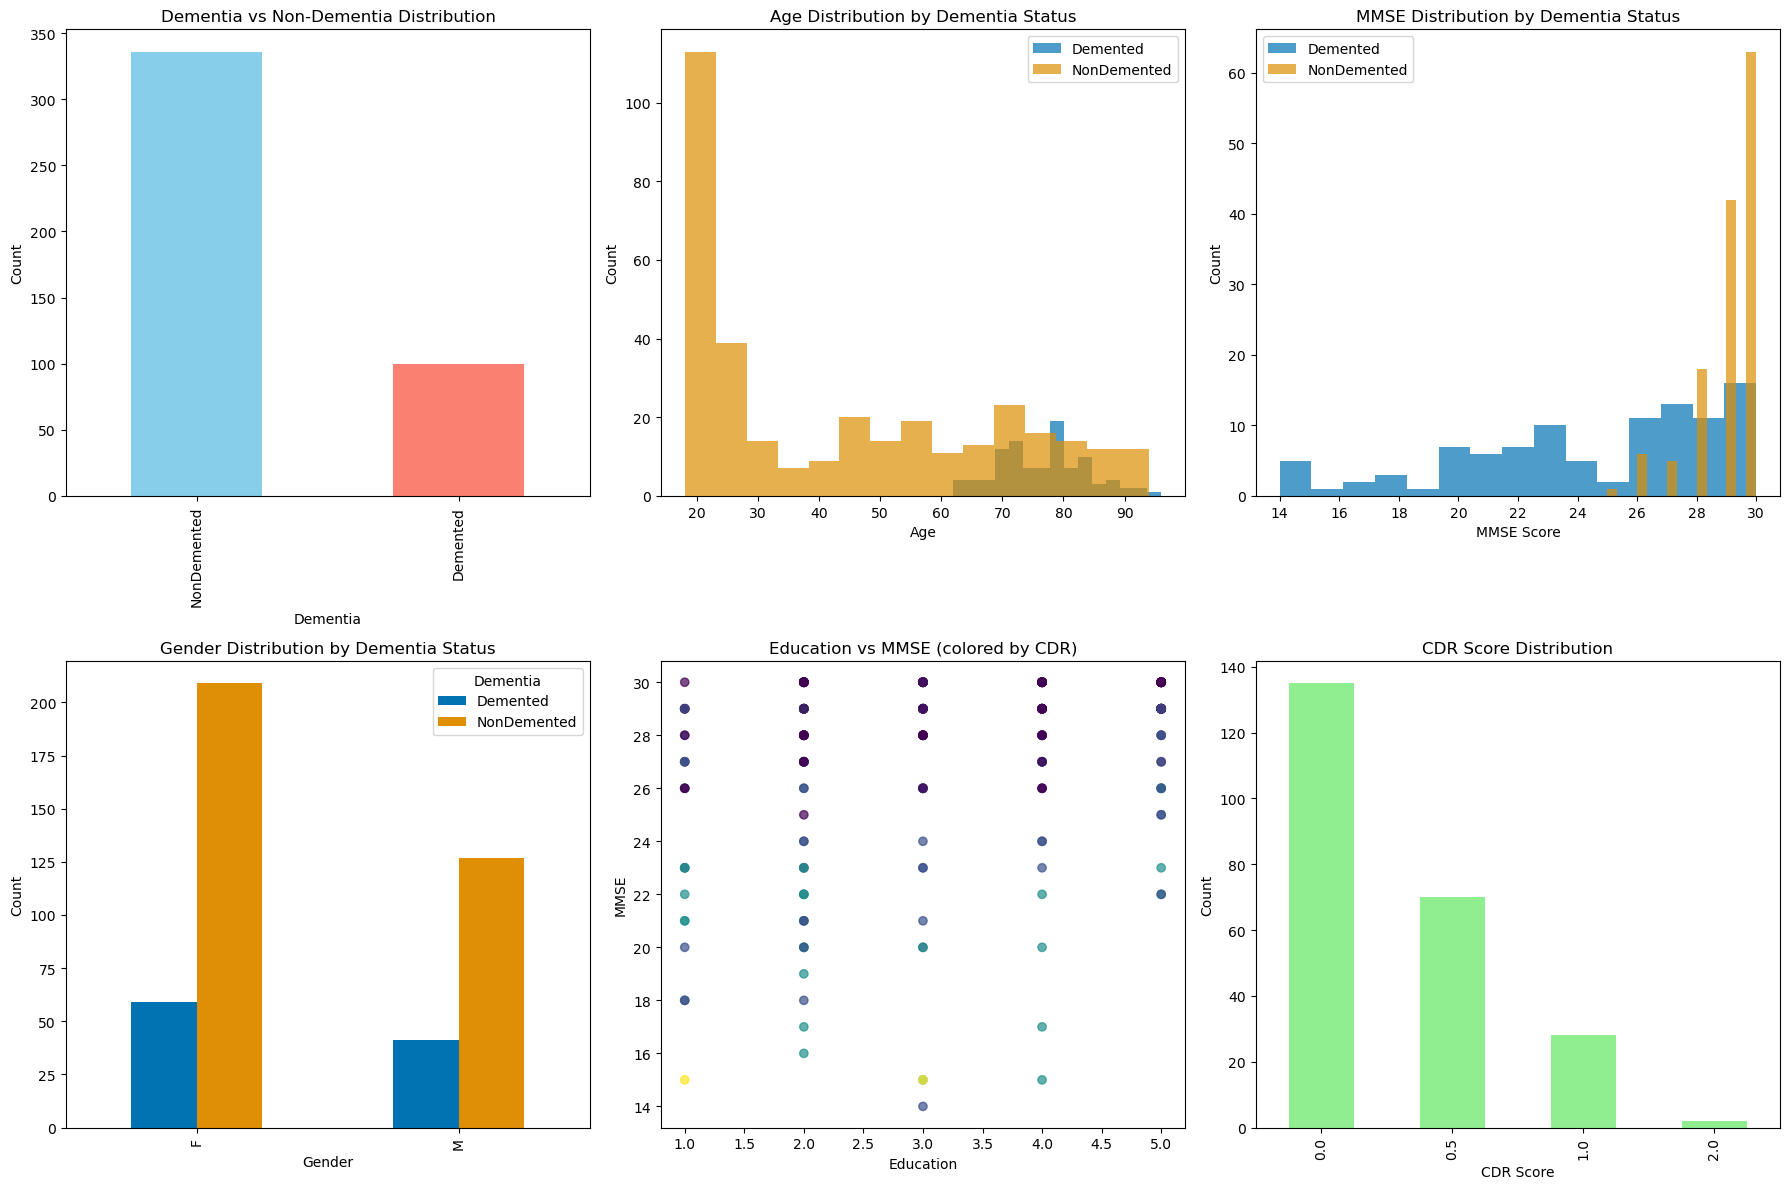


CORRELATION ANALYSIS


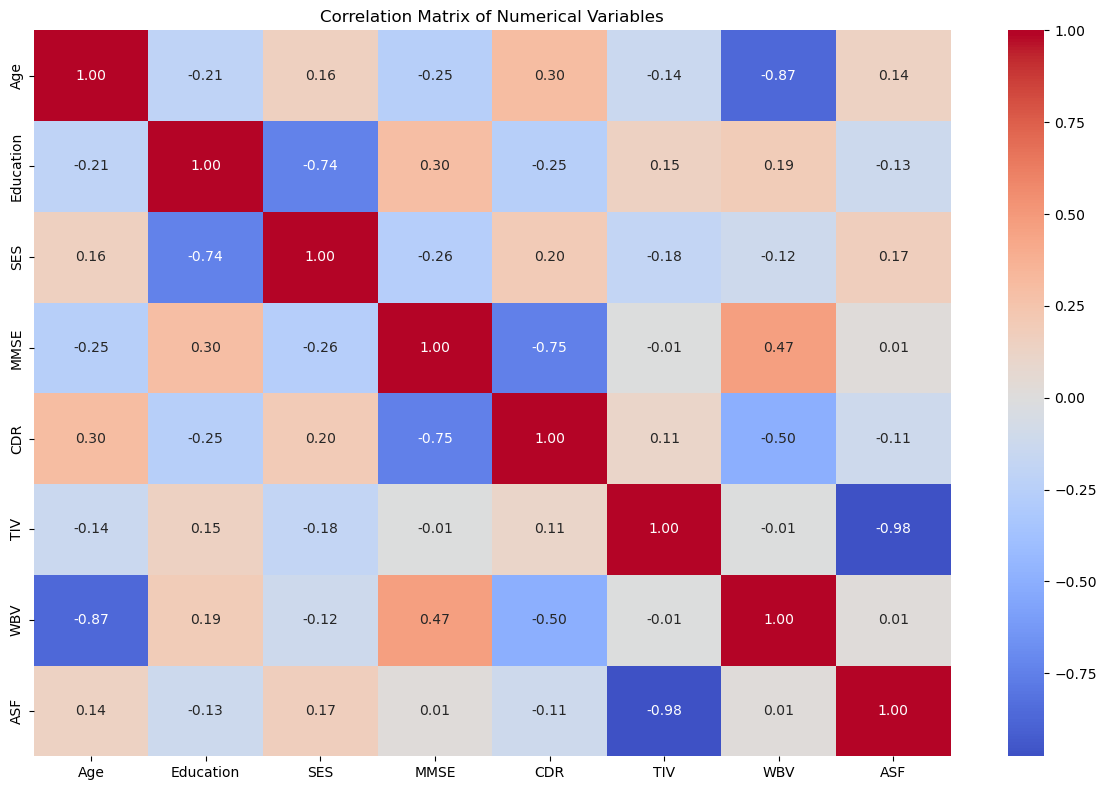


KEY INSIGHTS
1. Total subjects: 436
2. Dementia prevalence: 22.94%
3. Average age: 51.36 years
4. MMSE range: 14.0 to 30.0
5. Strongest correlation: MMSE and CDR: -0.75

Processed metadata saved to '../data/processed/oasis_processed_metadata.csv'


In [17]:
# Basic Analysis of OASIS-1 Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config.paths import OASIS_CSV_PATH

# Set up visualization style
plt.style.use('default')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the metadata
df = pd.read_csv(OASIS_CSV_PATH)
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Rename columns for easier access
df = df.rename(columns={'M/F': 'Gender', 'Educ': 'Education', 'eTIV': 'TIV', 'nWBV': 'WBV'})

# Convert to appropriate data types
df['CDR'] = pd.to_numeric(df['CDR'], errors='coerce')
df['MMSE'] = pd.to_numeric(df['MMSE'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create a binary classification target based on CDR
df['Dementia'] = df['CDR'].apply(lambda x: 'Demented' if x > 0 else 'NonDemented')

# 1. Basic Information
print("\n" + "="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(df.info())
print("\nColumn names:", df.columns.tolist())

# 2. Summary Statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(df.describe())

# 3. Check for Missing Values
print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 4. Class Distribution
print("\n" + "="*50)
print("CLASS DISTRIBUTION")
print("="*50)
class_dist = df['Dementia'].value_counts()
print(class_dist)
print(f"\nDementia Prevalence: {class_dist['Demented']/len(df)*100:.2f}%")

# 5. Demographic Analysis
print("\n" + "="*50)
print("DEMOGRAPHIC ANALYSIS")
print("="*50)
print("\nGender Distribution:")
print(df['Gender'].value_counts())

print("\nAge Distribution by Dementia Status:")
age_stats = df.groupby('Dementia')['Age'].describe()
print(age_stats)

# 6. Clinical Scores Analysis
print("\n" + "="*50)
print("CLINICAL SCORES ANALYSIS")
print("="*50)
print("\nMMSE Scores by Dementia Status:")
mmse_stats = df.groupby('Dementia')['MMSE'].describe()
print(mmse_stats)

print("\nCDR Distribution:")
print(df['CDR'].value_counts().sort_index())

# 7. Visualization
print("\n" + "="*50)
print("VISUALIZATIONS")
print("="*50)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 7.1 Class Distribution
df['Dementia'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'salmon'])
axes[0, 0].set_title('Dementia vs Non-Dementia Distribution')
axes[0, 0].set_ylabel('Count')

# 7.2 Age Distribution
for status in ['Demented', 'NonDemented']:
    subset = df[df['Dementia'] == status]
    axes[0, 1].hist(subset['Age'], alpha=0.7, label=status, bins=15)
axes[0, 1].set_title('Age Distribution by Dementia Status')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# 7.3 MMSE Distribution
for status in ['Demented', 'NonDemented']:
    subset = df[df['Dementia'] == status]
    axes[0, 2].hist(subset['MMSE'], alpha=0.7, label=status, bins=15)
axes[0, 2].set_title('MMSE Distribution by Dementia Status')
axes[0, 2].set_xlabel('MMSE Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend()

# 7.4 Gender Distribution by Dementia
gender_dementia = pd.crosstab(df['Gender'], df['Dementia'])
gender_dementia.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution by Dementia Status')
axes[1, 0].set_ylabel('Count')

# 7.5 Education vs MMSE
axes[1, 1].scatter(df['Education'], df['MMSE'], c=df['CDR'], cmap='viridis', alpha=0.7)
axes[1, 1].set_title('Education vs MMSE (colored by CDR)')
axes[1, 1].set_xlabel('Education')
axes[1, 1].set_ylabel('MMSE')

# 7.6 CDR Distribution
df['CDR'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 2], color='lightgreen')
axes[1, 2].set_title('CDR Score Distribution')
axes[1, 2].set_xlabel('CDR Score')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.savefig('../results/basic_analysis_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Correlation Analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)
# Select numerical columns for correlation
numerical_cols = ['Age', 'Education', 'SES', 'MMSE', 'CDR', 'TIV', 'WBV', 'ASF']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('../results/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Key Insights
print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)
print(f"1. Total subjects: {len(df)}")
print(f"2. Dementia prevalence: {class_dist['Demented']/len(df)*100:.2f}%")
print(f"3. Average age: {df['Age'].mean():.2f} years")
print(f"4. MMSE range: {df['MMSE'].min()} to {df['MMSE'].max()}")
print(f"5. Strongest correlation: MMSE and CDR: {correlation_matrix.loc['MMSE', 'CDR']:.2f}")

# 10. Save processed data
df.to_csv('../data/processed/oasis_processed_metadata.csv', index=False)
print("\nProcessed metadata saved to '../data/processed/oasis_processed_metadata.csv'")

# 5️⃣ Kaggle Dataset Download

In [35]:
import kaggle

import kagglehub

# Download latest version
dataset_path = "ninadaithal/imagesoasis"
data_dir = "../dataset/imagesoasis"
import os
os.makedirs(data_dir, exist_ok=True)
print(f"Downloading dataset '{dataset_path}' to {data_dir} ...")


In [32]:
try:
    kaggle.api.dataset_download_files(dataset_path, path=data_dir, unzip=True)
    print("Dataset downloaded and unzipped successfully ✅")
except Exception as e:
    print("Error downloading dataset:", e)

Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
Dataset downloaded and unzipped successfully ✅


# 6️⃣ Verify Dataset

In [36]:
file_count = sum([len(files) for r, d, files in os.walk(data_dir)])
print(f"Total files in dataset directory: {file_count}")

Total files in dataset directory: 86438
